In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
print(tf.__version__)

2.6.0


In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

## 사이트외 작업

In [4]:
data_dir

WindowsPath('C:/Users/DQ/.keras/datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
#사이트 외
list(data_dir.glob('*'))

[WindowsPath('C:/Users/DQ/.keras/datasets/flower_photos/daisy'),
 WindowsPath('C:/Users/DQ/.keras/datasets/flower_photos/dandelion'),
 WindowsPath('C:/Users/DQ/.keras/datasets/flower_photos/LICENSE.txt'),
 WindowsPath('C:/Users/DQ/.keras/datasets/flower_photos/roses'),
 WindowsPath('C:/Users/DQ/.keras/datasets/flower_photos/sunflowers'),
 WindowsPath('C:/Users/DQ/.keras/datasets/flower_photos/tulips')]

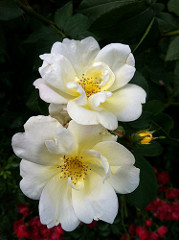

In [7]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [8]:
data_dir

WindowsPath('C:/Users/DQ/.keras/datasets/flower_photos')

In [9]:
# 폴더 로드 방법 1
folder='C:/Users/DQ/.keras/datasets/flower_photos/tulips/*'
fileList = list(folder)
len(fileList)

50

In [10]:
# 방법2
from glob import glob
folder='C:/Users/DQ/.keras/datasets/flower_photos/tulips/*'
fileList=glob(folder)
len(fileList)

799

In [11]:
# 방법3
folder = list(data_dir.glob('*'))[5]
file_list=list(folder.glob('*'))
len(fileList)

799

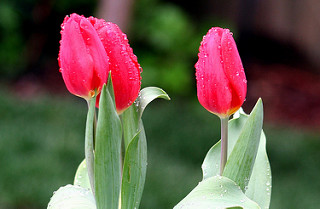

In [12]:
PIL.Image.open(str(fileList[0]))

In [32]:
folderList = []
tmp = list(data_dir.glob('*'))

for i in range(len(tmp)):
    tmp1= str(tmp[i])
    tmp2=tmp1.split('\\')[6]
    if tmp2!="LICENSE.txt":
        folderList.append(tmp2)

In [85]:
folderList

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

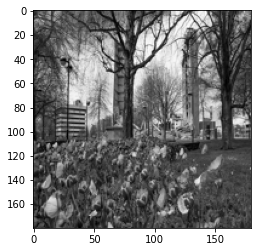

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

X=[]; y=[]; catNum=0

for item in folderList:
    folder='C:/Users/DQ/.keras/datasets/flower_photos/' + item +'/*'
    fileList=glob(folder)

    for file in fileList:
        img = PIL.Image.open(str(file))
        img = img.resize((180, 180))
        img = img.convert('L')
        imgarr = np.array(img)
        imgre = imgarr/255
        plt.imshow(imgre, cmap='gray')
        #print(np.shape(imgre))
        X.append(imgre)
        y.append(catNum)
    catNum+=1

In [65]:
print(np.shape(X))
print(np.shape(y))
print(np.unique(y))

(3670, 180, 180)
(3670,)
[0 1 2 3 4]


In [98]:
item=0
folder=list(data_dir.glob('*'))[item]
file_list=list(folder.glob('*'))
len(file_list)

633

In [67]:
np.savez('data/flower.npz', x=X, y=y)

In [68]:
# 새파일이라 생각하고 작업
data = np.load('data/flower.npz')
list(data)
class_name=['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [69]:
x=data['x']
y=data['y']

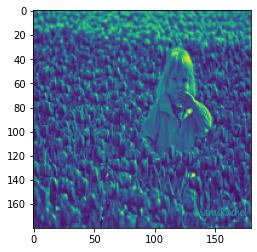

In [70]:
plt.imshow(x[3500])

In [71]:
np.unique(y)

array([0, 1, 2, 3, 4])

In [72]:
y[3500]

4

In [73]:
class_name[y[3500]]

'tulips'

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
imges=x; labels=y; class_names=class_name

<Figure size 720x720 with 0 Axes>

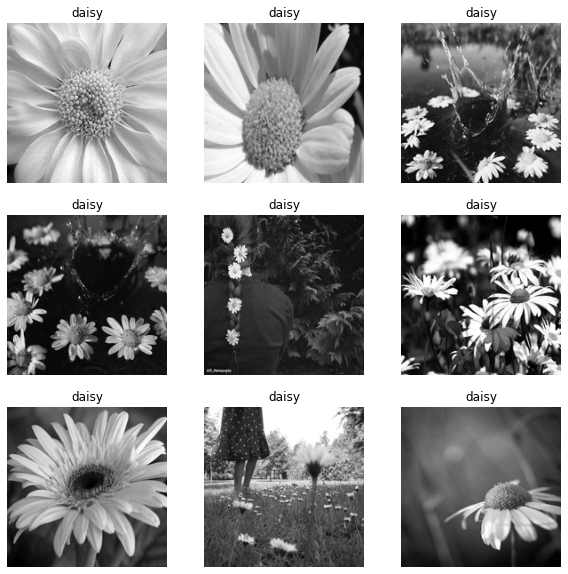

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
images=x; labels=y; class_names=class_name
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [91]:
## 인공신경망에서 모델 제작

# 트레이닝, 테스트 데이터로 분리하기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [92]:
len(np.unique(y_train)) # 모델의 최종 dense 유닛 갯수

5

In [93]:
# 교재 94~96 페이지와 비교시 안한 작업
# 1. reshape으로 28*28 을 784로 변환하지 않음 > mlayers.Flatten으로 대처함
# 2. /255로 나눈작업 > 미리 작업된 자료라 생략
# 3. y_label을 인코딩해서 원핫으로 변경(96페이지)
# loss='sparse_categorical_crossentropy' 로 원핫인코딩을 동시에 진행함

In [94]:
# 모델구축
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(180, 180)), ## 사이즈 수정
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation='softmax')  ## 수정
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # 96p의 원핫 인코딩 작업을 해주는 코드
              metrics=['accuracy'])

In [95]:
# 모델 훈련 평가
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
92/92 [==============================] - 1s 5ms/step - loss: 4.0238 - accuracy: 0.2398
Epoch 2/5
92/92 [==============================] - 0s 5ms/step - loss: 1.5837 - accuracy: 0.2258
Epoch 3/5
92/92 [==============================] - 0s 5ms/step - loss: 1.5952 - accuracy: 0.2452
Epoch 4/5
92/92 [==============================] - 0s 5ms/step - loss: 1.6017 - accuracy: 0.2493
Epoch 5/5
92/92 [==============================] - 0s 5ms/step - loss: 1.6000 - accuracy: 0.2483
23/23 - 0s - loss: 1.6023 - accuracy: 0.2289


[1.6022906303405762, 0.2288828343153]

## 성공율을 높이려먼
1. 파람의 갯수를 늘인다
2. 덴스층을 추가한다
3. 드롭아웃을 제거한다
4. 배치를 작게한다
5. 에포를 많이 한다
6. 러닝레이트 값을 더 작게 한다

In [108]:
# 모델 구축
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(180, 180)), ## 여기 수정
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),


  # tf.keras.layers.Dropout(0.2),   # 파람 20% 제거 # 제거 안할경우 정확도가 더 높아짐
  tf.keras.layers.Dense(5, activation='softmax')  ## 여기 수정
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # 
              metrics=['accuracy'])

In [115]:
# 모델 훈련 평가
model.fit(x_train, y_train, epochs=94)
model.evaluate(x_test,  y_test, verbose=2)
#model.evaluate(x_test,  y_test, validation_data=(x_test, y_test))
# 체크포인트로 save 하면 원하는 지점으로 돌릴 수 있음

Epoch 1/94
92/92 [==============================] - 1s 9ms/step - loss: 0.1054 - accuracy: 0.9693
Epoch 2/94
92/92 [==============================] - 1s 9ms/step - loss: 0.2579 - accuracy: 0.9114
Epoch 3/94
92/92 [==============================] - 1s 9ms/step - loss: 0.0637 - accuracy: 0.9826
Epoch 4/94
92/92 [==============================] - 1s 9ms/step - loss: 0.1339 - accuracy: 0.9547
Epoch 5/94
92/92 [==============================] - 1s 8ms/step - loss: 0.1178 - accuracy: 0.9632
Epoch 6/94
92/92 [==============================] - 1s 8ms/step - loss: 0.2230 - accuracy: 0.9346
Epoch 7/94
92/92 [==============================] - 1s 9ms/step - loss: 0.6460 - accuracy: 0.8127
Epoch 8/94
92/92 [==============================] - 1s 9ms/step - loss: 0.2239 - accuracy: 0.9257
Epoch 9/94
92/92 [==============================] - 1s 9ms/step - loss: 0.1112 - accuracy: 0.9704
Epoch 10/94
92/92 [==============================] - 1s 9ms/step - loss: 0.1077 - accuracy: 0.9676
Epoch 11/94
92/92 [

[5.368675708770752, 0.25613078474998474]

----------실제값--------
0

---예측값-------
3


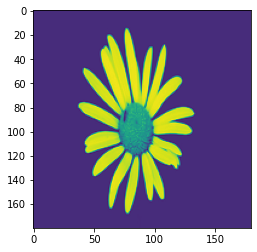

In [112]:
print('----------실제값--------')
plt.imshow(x_test[0])
print(y_test[0])

print('\n---예측값-------')
y_pred=model.predict(x_test[0:1])
print(np.argmax(y_pred))